<a href="https://colab.research.google.com/github/lnomkin/Text_Analysis_Final_Project/blob/main/311_Service_Request_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#311 Service Request Comparison: NYC Open Data and NYC/311 Subreddit 2020-2023, from the De Blasio to the Adams administrations

##1. Introduction: Understanding the public’s response to social service programming

  The pandemic exposed New York City’s deep inequalities, impacting job loss, education access, and homelessness. Today, economic challenges and the end of Covid-19 aid continue to affect low-income communities. The city’s recovery efforts varied under de Blasio and Adams.
  
  De Blasio, elected on a progressive platform, saw a 15% wage increase for the bottom earners and a 13% decrease in poverty, the lowest since 2005 [Family, 2022](https://www.icph.org/reports/family-homelessness-in-new-york-city-what-the-adams-administration-can-learn-from-previous-mayoralties/#keeping-new-yorkers-housed-homelessness-prevention-vouchers-and-housing).  His key achievements included universal Pre-K and 3-K, easing childcare burdens, and streamlining social services. These gains reversed in the pandemic’s first year.
  
  Adams, elected on a moderate platform, focused on crime, economic recovery, and supporting small businesses [Get Stuff Done, 2024](https://www.nyc.gov/content/getstuffdone/pages/initiatives). Under his administration, cash-assistance recipients rose by 23%, while staffing shortages and an asylum crisis strained services [Family, 2022](https://www.icph.org/reports/family-homelessness-in-new-york-city-what-the-adams-administration-can-learn-from-previous-mayoralties/#keeping-new-yorkers-housed-homelessness-prevention-vouchers-and-housing). Poverty and unemployment remain high, and Adams faces the lowest approval ratings of any Mayor.
  
  Analyzing 311 service requests for social services during the pandemic offers insights into residents’ experiences. While Open Data NYC provides request types, the full text is unavailable. Complementing this with sentiment analysis of Reddit discussions can reveal how young adults and older residents perceived government services during this time, the majority of Reddit users [Anderson, 2024](https://www.socialchamp.io/blog/reddit-demographics/).

  This research is critical for understanding how New Yorkers engage with social services. As the city faces ongoing challenges like the housing crisis, child care shortages, and rising welfare requests, this study can inform policymakers on public sentiment and service effectiveness by answering the following questions.




#1.2 Research Questions:
1.  Is there a change in sentiment in NYC/311 Reddit posts across the de Blasio and Adams administrations, during a period of a shift in focus from self sufficiency to expanded benefits access?
2.  Comparing key social service topics, what are the general trends in 311 service requests and NYC/311 Reddit posts related to social services across the two administrations? What is the sentiment of these themes?
3.  What are the most frequently used keywords by the public on the r/NYC 311 subreddit and 311 service complaints?


#1.3 Hypothesis:
1.  There will likely be more complaints related to welfare and human services during the Adams administration due to expanded access leading to staffing shortages and delays in processing times.
2.  The expanded pandemic-related aid created a dependency on social services, with complaints likely focusing on barriers to access, benefit expirations, and challenges in meeting basic needs.
3.  Sentiment around social services during the Adams administration is expected to be more negative due to budget cuts, the city's response to the immigration crisis, and efforts to roll back the “Right to Shelter” policy.
4.  Frequent keywords under de Blasio will include unemployment, benefits enrollment, and education, while under Adams, they are expected to focus on housing, migrants, and enrollment delays.


#1.4 Significance and Importance to Public Policy:
This project offers insights into how New Yorkers respond to social services given mayoral changes. Policymakers could use these findings to assess what areas may need further resources or adjustments. Insights into the sentiment trends could inform perception of policy.

In [ ]:
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import asyncpraw
import asyncio
import time

# Initialize Async PRAW
reddit = asyncpraw.Reddit(
    client_id="xb9MZu2WxExu2aLo94v8rA",
    client_secret="4s-xlQ0vw1qnK7Pa06o-tc8as4h0Yw",
    user_agent="reddit_text_extractor (by u/Good-Bread-994)"
)

# Subreddits to fetch data from
subreddits = ["nyc", "AskNYC", "newyorkcity", "NYChousing", "311"]

# Function to fetch posts and their top parent comment
async def fetch_posts(subreddits):
    posts = []

    # Loop through each subreddit
    for subreddit_name in subreddits:
        subreddit = await reddit.subreddit(subreddit_name)  # Await the subreddit coroutine
        async for submission in subreddit.top(limit=500):  # Adjust the limit if needed
            # Ensure submission is fully loaded
            await submission.load()

            # Fetch the top parent comment
            submission.comments.replace_more(limit=0)  # Replace "more comments" with the actual comments
            top_comment = submission.comments[0].body if submission.comments else "No comments"

            posts.append({
                'subreddit': subreddit_name,
                'title': submission.title,
                'selftext': submission.selftext,
                'created_utc': submission.created_utc,
                'top_parent_comment': top_comment,  # Add the top parent comment
            })

    return posts

# Function to run the async task and save to a CSV
async def main():
    posts = await fetch_posts(subreddits)

    # Convert to DataFrame
    df = pd.DataFrame(posts)

    # Save to CSV
    df.to_csv('reddit_threads_with_parent_comments.csv', index=False)
    print("Data saved to 'reddit_threads_with_parent_comments.csv'")

    # Close the reddit session to avoid unclosed session warning
    await reddit.close()

# In Google Colab, use await directly:
await main()
#The following script is adapted from a Medium tutorial on building a Reddit Scraper with Python and Colab: https://python.plainenglish.io/two-step-wsb-scraper-with-colab-b240af5a6105 and from Melanie Walsh's Reddit Data Collection and Analysis: https://melaniewalsh.github.io/Intro-Cultural-Analytics/04-Data-Collection/14-Reddit-Data.html

<ipython-input-3-d2c163e2a560>:28: RuntimeWarning: coroutine 'CommentForest.replace_more' was never awaited
  submission.comments.replace_more(limit=0)  # Replace "more comments" with the actual comments


Data saved to 'reddit_threads_with_parent_comments.csv'


Download file with Reddit data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from datetime import datetime

# Load the existing CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Python F24/Final Project/reddit_threads_with_parent_comments - Use for Project.csv')

# Convert 'created_utc' to a datetime object (human-readable format)
df['created_time'] = pd.to_datetime(df['created_utc'], unit='s')

# Filter posts between 2020 and 2023
reddit_df = df[(df['created_time'].dt.year >= 2020) & (df['created_time'].dt.year <= 2023)]
#I adapted this script for the above and below codes from Rebecca Krisel's Intro to Pandas Workshop: https://github.com/rskrisel/pandas/blob/main/pandas_workshop_2024.ipynb

In [4]:
reddit_df.sample(100)


,subreddit,title,selftext,created_utc,top_parent_comment,created_time
1390,311,"Omaha Stylee, did not think there was one",NaN,1608078981,I love 311 and I love beer more than the next ...,2020-12-16 00:36:21
1063,newyorkcity,"Frederick Douglass statue, 110th street, Centr...",NaN,1594046941,"He's been doing great things, I hear.",2020-07-06 14:49:01
1136,newyorkcity,Adults returning to office life,NaN,1645451358,"Aww, Frank, you're so brave! Enjoy that spaghe...",2022-02-21 13:49:18
919,newyorkcity,sunset‘s only getting later,NaN,1673653665,It really was an excellent one tonight. Saw th...,2023-01-13 23:47:45
118,nyc,Wild clouds last night over NYC,NaN,1615472933,1 Vandy is such a cool addition to the skyline...,2021-03-11 14:28:53
...,...,...,...,...,...,...
231,nyc,Kind of nerdy but… I bought a subway platform ...,NaN,1663822911,Stop now. This is how map obsession begins. Fi...,2022-09-22 05:01:51
294,nyc,It’s the little things that make nyc great #no...,NaN,1612742665,New York walking signs:\n \nStop: fuck you don...,2021-02-08 00:04:25
790,newyorkcity,New York State of Inside,NaN,1587585071,"We got to get over this notion that the ""open ...",2020-04-22 19:51:11
242,nyc,"Merry Christmas, New York!",NaN,1608846499,"I'm uptown by the Cloisters, but I wanted to c...",2020-12-24 21:48:19


In [5]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   subreddit           1451 non-null   object        
 1   title               1451 non-null   object        
 2   selftext            503 non-null    object        
 3   created_utc         1451 non-null   int64         
 4   top_parent_comment  1451 non-null   object        
 5   created_time        1451 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 68.1+ KB


In [6]:
reddit_df['created_utc'] = pd.to_datetime(reddit_df['created_utc'],  unit='s')
reddit_df['created_utc_str'] = reddit_df['created_utc'].dt.strftime('%Y-%m-%d')

In [7]:
reddit_df.dtypes

,0
subreddit,object
title,object
selftext,object
created_utc,datetime64[ns]
top_parent_comment,object
created_time,datetime64[ns]
created_utc_str,object


In [8]:
reddit_df[reddit_df.duplicated(keep=False)]

,subreddit,title,selftext,created_utc,top_parent_comment,created_time,created_utc_str


In [9]:
reddit_df.columns

Index(['subreddit', 'title', 'selftext', 'created_utc', 'top_parent_comment',
       'created_time', 'created_utc_str'],
      dtype='object')

In [10]:
reddit_df=reddit_df.rename(columns={'created_utc_str':'date', 'selftext':'textpost'})
reddit_df

,subreddit,title,textpost,created_utc,top_parent_comment,created_time,date
0,nyc,9/11 Tribute in Light shimmering in the rain t...,NaN,2020-09-11 02:23:44,That really is beautiful. \nThank you for this.,2020-09-11 02:23:44,2020-09-11
1,nyc,My COVID-19 Story. Brooklyn.,"Hello,\n\nJust giving a heads up to what I and...",2020-02-28 17:48:26,"In case no one said it already, thanks for doi...",2020-02-28 17:48:26,2020-02-28
2,nyc,I Am a New York City Public High School Studen...,I'd like to preface this by stating that remot...,2022-01-07 02:53:12,Edit:\nIt seems some school officials are tryi...,2022-01-07 02:53:12,2022-01-07
3,nyc,This is why i love NYC,NaN,2020-04-01 16:25:08,First time ever being called essential by work...,2020-04-01 16:25:08,2020-04-01
4,nyc,Fuck,NaN,2020-06-14 22:24:39,Every. Time.,2020-06-14 22:24:39,2020-06-14
...,...,...,...,...,...,...,...
1446,311,Not sure if they’ve ever played here in Austin...,NaN,2021-03-27 00:59:44,In Utah it's our USANA and a Mexican cafe in S...,2021-03-27 00:59:44,2021-03-27
1447,311,"My (late) contribution to 311 Day, thought I'd...",NaN,2021-03-13 04:06:52,Very nicely done!!!,2021-03-13 04:06:52,2021-03-13
1448,311,Some of my 311 memorabilia,NaN,2021-01-27 04:56:53,Nicely laid out! Cheers,2021-01-27 04:56:53,2021-01-27
1449,311,Such a good pump up jam 🤘,NaN,2020-08-06 22:14:38,I'd be perfectly sad if rap was a fad\nBut it'...,2020-08-06 22:14:38,2020-08-06


In [11]:
reddit_drop_date_df = reddit_df.drop(columns=['created_utc', 'created_time'])
reddit_drop_date_df

,subreddit,title,textpost,top_parent_comment,date
0,nyc,9/11 Tribute in Light shimmering in the rain t...,NaN,That really is beautiful. \nThank you for this.,2020-09-11
1,nyc,My COVID-19 Story. Brooklyn.,"Hello,\n\nJust giving a heads up to what I and...","In case no one said it already, thanks for doi...",2020-02-28
2,nyc,I Am a New York City Public High School Studen...,I'd like to preface this by stating that remot...,Edit:\nIt seems some school officials are tryi...,2022-01-07
3,nyc,This is why i love NYC,NaN,First time ever being called essential by work...,2020-04-01
4,nyc,Fuck,NaN,Every. Time.,2020-06-14
...,...,...,...,...,...
1446,311,Not sure if they’ve ever played here in Austin...,NaN,In Utah it's our USANA and a Mexican cafe in S...,2021-03-27
1447,311,"My (late) contribution to 311 Day, thought I'd...",NaN,Very nicely done!!!,2021-03-13
1448,311,Some of my 311 memorabilia,NaN,Nicely laid out! Cheers,2021-01-27
1449,311,Such a good pump up jam 🤘,NaN,I'd be perfectly sad if rap was a fad\nBut it'...,2020-08-06


In [12]:
reddit_drop_date_df.sort_values(by='date', ascending=False)

,subreddit,title,textpost,top_parent_comment,date
1362,311,Reinterpretation of Transistor Album,Hey all!\n\nMy niece did a really cool cover f...,Love it! Way better than anything AI,2023-12-31
1149,newyorkcity,Saw One In The Wild,Last night at Whitestone Bridge,Pretty sure we are going to see more of these ...,2023-12-27
1301,311,Merry Christmas 311 Nation. With love from the...,Hope you all have a great day with your friend...,Merry Christmas!,2023-12-25
1431,311,Who still has one of these?? lol,One of the more interesting 311 merch items. I...,"Dude, I'm still waiting for, ""311 - The Flamet...",2023-12-23
1261,311,Texas HEB represent!,"I’ve always heard of this and seen pics, but n...",It's at the HEB in Plano as well 😁,2023-12-20
...,...,...,...,...,...
446,AskNYC,How to cope with racial bias on the UWS?,First I realize this will be downvoted to deat...,"Black female to black female, go about your bu...",2020-01-19
808,newyorkcity,One of the coolest things to see in the nyc su...,NaN,I lived here all my life and I still love this...,2020-01-11
1342,311,Throwback to senior year of high school. Watch...,NaN,These years were the pinnacle of 311 shows. T...,2020-01-09
664,AskNYC,Thanks r/AskNYC,Just wanted to give a thanks to this sub for i...,By the way... Los Tacos at Chelsea Market... p...,2020-01-04


In [13]:
print(reddit_drop_date_df['date'].min(), reddit_drop_date_df['date'].max())


2020-01-01 2023-12-31


In [14]:
reddit_drop_date_df.groupby('subreddit').agg({'title': 'count', 'textpost': 'count', 'top_parent_comment': 'count', 'date': 'first'}).sort_values(by='title', ascending=False)

,title,textpost,top_parent_comment,date
subreddit,,,,
newyorkcity,437,33,437,2022-05-07
AskNYC,410,377,410,2023-07-29
nyc,330,35,330,2020-09-11
311,261,48,261,2023-06-03
NYChousing,13,10,13,2022-05-08


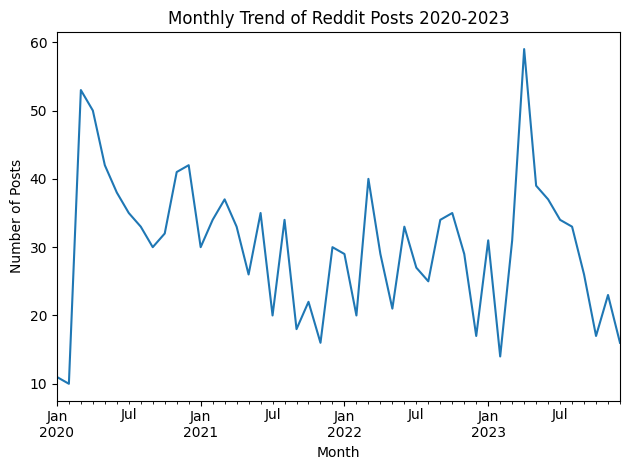

In [15]:
import matplotlib.pyplot as plt

# Convert 'date' to datetime format if it's not already
reddit_drop_date_df['date'] = pd.to_datetime(reddit_drop_date_df['date'])

# Group by week and month, counting the number of posts
weekly_trend = reddit_drop_date_df.groupby(reddit_drop_date_df['date'].dt.to_period('W')).size()
monthly_trend = reddit_drop_date_df.groupby(reddit_drop_date_df['date'].dt.to_period('M')).size()

# Plotting weekly trend
monthly_trend.plot(kind='line')

# Adding title and labels
plt.title('Monthly Trend of Reddit Posts 2020-2023')  # Title of the plot
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Number of Posts')  # Label for the y-axis

# Display the plot
plt.tight_layout()  # Adjust the layout for better readability
plt.show()
#I adapted the scripts to produce the monthly and annual trends from Rebecca Krisel's Intro to Pandas Workshop: https://github.com/rskrisel/pandas/blob/main/pandas_workshop_2024.ipynb

<ipython-input-16-ef8fecb57978>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  annual_trend = reddit_drop_date_df.groupby(reddit_drop_date_df['date'].dt.to_period('A')).size()


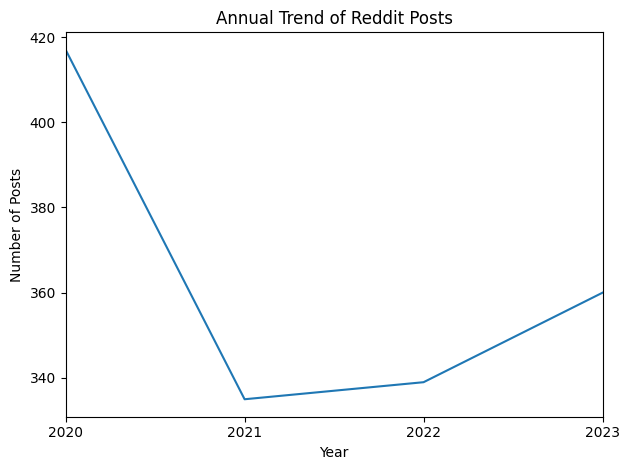

In [16]:
annual_trend = reddit_drop_date_df.groupby(reddit_drop_date_df['date'].dt.to_period('A')).size()

annual_trend.plot(kind='line')

plt.title('Annual Trend of Reddit Posts')  # Title of the plot
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Number of Posts')  # Label for the y-axis

plt.tight_layout()  # Adjust the layout for better readability
plt.show()


In [17]:
# Search for rows where any column contains the word
result = reddit_drop_date_df.apply(lambda row: row.astype(str).str.contains('311', case=False).any(), axis=1)
filtered_df = reddit_drop_date_df[result]

total_count = len(filtered_df)

# Print the total count
print("Total count of rows containing '311':", total_count)

Total count of rows containing '311': 270


In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab model


# Define stopwords
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    if pd.isna(text):  # Check if the value is NaN
        return ''  # Return an empty string for NaN values
    tokens = word_tokenize(str(text))  # Tokenize the text
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]  # Remove stopwords and punctuation
    return ' '.join(filtered_tokens)  # Join tokens back into a string

# List of columns to clean
columns_to_clean = ['top_parent_comment', 'title', 'textpost']  # Replace with your column names

# Process each column
for column in columns_to_clean:
    if column in reddit_drop_date_df.columns:  # Ensure column exists in the DataFrame
        reddit_drop_date_df[f'cleaned_{column}'] = reddit_drop_date_df[column].apply(tokenize_and_remove_stopwords)

# Display the updated DataFrame
print(reddit_drop_date_df.head())
# I adapted this script from Rebecca Krisel's Intro to NLTK Workshop: https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb and prompted ChatGPT to update the code to hanlde NaN values.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


  subreddit                                              title  \
0       nyc  9/11 Tribute in Light shimmering in the rain t...   
1       nyc                       My COVID-19 Story. Brooklyn.   
2       nyc  I Am a New York City Public High School Studen...   
3       nyc                             This is why i love NYC   
4       nyc                                               Fuck   

                                            textpost  \
0                                                NaN   
1  Hello,\n\nJust giving a heads up to what I and...   
2  I'd like to preface this by stating that remot...   
3                                                NaN   
4                                                NaN   

                                  top_parent_comment       date  \
0   That really is beautiful.  \nThank you for this. 2020-09-11   
1  In case no one said it already, thanks for doi... 2020-02-28   
2  Edit:\nIt seems some school officials are tryi... 2022-01-07  

In [22]:
reddit_drop_date_df

,subreddit,title,textpost,top_parent_comment,date,cleaned_top_parent_comment,cleaned_title,cleaned_textpost
0,nyc,9/11 Tribute in Light shimmering in the rain t...,NaN,That really is beautiful. \nThank you for this.,2020-09-11,really beautiful Thank,Tribute Light shimmering rain tonight Worth ge...,
1,nyc,My COVID-19 Story. Brooklyn.,"Hello,\n\nJust giving a heads up to what I and...","In case no one said it already, thanks for doi...",2020-02-28,case one said already thanks really appreciate,Story Brooklyn,Hello giving heads doctor considered fucked si...
2,nyc,I Am a New York City Public High School Studen...,I'd like to preface this by stating that remot...,Edit:\nIt seems some school officials are tryi...,2022-01-07,Edit seems school officials trying find OP saf...,New York City Public High School Student Situa...,like preface stating remote learning absolutel...
3,nyc,This is why i love NYC,NaN,First time ever being called essential by work...,2020-04-01,First time ever called essential working Target,love NYC,
4,nyc,Fuck,NaN,Every. Time.,2020-06-14,Every Time,Fuck,
...,...,...,...,...,...,...,...,...
1446,311,Not sure if they’ve ever played here in Austin...,NaN,In Utah it's our USANA and a Mexican cafe in S...,2021-03-27,Utah USANA Mexican cafe Salt Lake called Red I...,sure ever played Austin Texas always imagined ...,
1447,311,"My (late) contribution to 311 Day, thought I'd...",NaN,Very nicely done!!!,2021-03-13,nicely done,late contribution 311 Day thought make mini re...,
1448,311,Some of my 311 memorabilia,NaN,Nicely laid out! Cheers,2021-01-27,Nicely laid Cheers,311 memorabilia,
1449,311,Such a good pump up jam 🤘,NaN,I'd be perfectly sad if rap was a fad\nBut it'...,2020-08-06,perfectly sad rap fad thought come shot Stupid...,good pump jam,


In [23]:
reddit_short_df = reddit_drop_date_df.drop(columns=['title', 'textpost','top_parent_comment',])
reddit_short_df

,subreddit,date,cleaned_top_parent_comment,cleaned_title,cleaned_textpost
0,nyc,2020-09-11,really beautiful Thank,Tribute Light shimmering rain tonight Worth ge...,
1,nyc,2020-02-28,case one said already thanks really appreciate,Story Brooklyn,Hello giving heads doctor considered fucked si...
2,nyc,2022-01-07,Edit seems school officials trying find OP saf...,New York City Public High School Student Situa...,like preface stating remote learning absolutel...
3,nyc,2020-04-01,First time ever called essential working Target,love NYC,
4,nyc,2020-06-14,Every Time,Fuck,
...,...,...,...,...,...
1446,311,2021-03-27,Utah USANA Mexican cafe Salt Lake called Red I...,sure ever played Austin Texas always imagined ...,
1447,311,2021-03-13,nicely done,late contribution 311 Day thought make mini re...,
1448,311,2021-01-27,Nicely laid Cheers,311 memorabilia,
1449,311,2020-08-06,perfectly sad rap fad thought come shot Stupid...,good pump jam,


In [25]:
# Create a new column 'combined_text' that concatenates 'cleaned_title' and 'cleaned_textpost'
reddit_short_df['combined_text'] = reddit_short_df['cleaned_title'] + ' ' + reddit_short_df['cleaned_textpost']

# Display the updated DataFrame with the new 'combined_text' column
print(reddit_short_df[['cleaned_title', 'cleaned_textpost', 'combined_text']].head())


                                       cleaned_title  \
0  Tribute Light shimmering rain tonight Worth ge...   
1                                     Story Brooklyn   
2  New York City Public High School Student Situa...   
3                                           love NYC   
4                                               Fuck   

                                    cleaned_textpost  \
0                                                      
1  Hello giving heads doctor considered fucked si...   
2  like preface stating remote learning absolutel...   
3                                                      
4                                                      

                                       combined_text  
0  Tribute Light shimmering rain tonight Worth ge...  
1  Story Brooklyn Hello giving heads doctor consi...  
2  New York City Public High School Student Situa...  
3                                          love NYC   
4                                              Fuck

In [26]:
reddit_short_df

,subreddit,date,cleaned_top_parent_comment,cleaned_title,cleaned_textpost,combined_text
0,nyc,2020-09-11,really beautiful Thank,Tribute Light shimmering rain tonight Worth ge...,,Tribute Light shimmering rain tonight Worth ge...
1,nyc,2020-02-28,case one said already thanks really appreciate,Story Brooklyn,Hello giving heads doctor considered fucked si...,Story Brooklyn Hello giving heads doctor consi...
2,nyc,2022-01-07,Edit seems school officials trying find OP saf...,New York City Public High School Student Situa...,like preface stating remote learning absolutel...,New York City Public High School Student Situa...
3,nyc,2020-04-01,First time ever called essential working Target,love NYC,,love NYC
4,nyc,2020-06-14,Every Time,Fuck,,Fuck
...,...,...,...,...,...,...
1446,311,2021-03-27,Utah USANA Mexican cafe Salt Lake called Red I...,sure ever played Austin Texas always imagined ...,,sure ever played Austin Texas always imagined ...
1447,311,2021-03-13,nicely done,late contribution 311 Day thought make mini re...,,late contribution 311 Day thought make mini re...
1448,311,2021-01-27,Nicely laid Cheers,311 memorabilia,,311 memorabilia
1449,311,2020-08-06,perfectly sad rap fad thought come shot Stupid...,good pump jam,,good pump jam


In [27]:
# Drop the 'cleaned_textpost' column
reddit_short_df = reddit_short_df.drop(columns=['cleaned_textpost', 'cleaned_title'])

# Display the updated DataFrame
print(reddit_short_df.head())


  subreddit       date                         cleaned_top_parent_comment  \
0       nyc 2020-09-11                             really beautiful Thank   
1       nyc 2020-02-28     case one said already thanks really appreciate   
2       nyc 2022-01-07  Edit seems school officials trying find OP saf...   
3       nyc 2020-04-01    First time ever called essential working Target   
4       nyc 2020-06-14                                         Every Time   

                                       combined_text  
0  Tribute Light shimmering rain tonight Worth ge...  
1  Story Brooklyn Hello giving heads doctor consi...  
2  New York City Public High School Student Situa...  
3                                          love NYC   
4                                              Fuck   


In [28]:
reddit_short_df

,subreddit,date,cleaned_top_parent_comment,combined_text
0,nyc,2020-09-11,really beautiful Thank,Tribute Light shimmering rain tonight Worth ge...
1,nyc,2020-02-28,case one said already thanks really appreciate,Story Brooklyn Hello giving heads doctor consi...
2,nyc,2022-01-07,Edit seems school officials trying find OP saf...,New York City Public High School Student Situa...
3,nyc,2020-04-01,First time ever called essential working Target,love NYC
4,nyc,2020-06-14,Every Time,Fuck
...,...,...,...,...
1446,311,2021-03-27,Utah USANA Mexican cafe Salt Lake called Red I...,sure ever played Austin Texas always imagined ...
1447,311,2021-03-13,nicely done,late contribution 311 Day thought make mini re...
1448,311,2021-01-27,Nicely laid Cheers,311 memorabilia
1449,311,2020-08-06,perfectly sad rap fad thought come shot Stupid...,good pump jam


Need to separate by two time periods.

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
from datetime import datetime


# Convert start_date and end_date to datetime64[ns]
start_date_deblasio = pd.to_datetime('2020-01-01').to_numpy().astype('datetime64[ns]')
end_date_deblasio = pd.to_datetime('2021-12-31').to_numpy().astype('datetime64[ns]')

start_date_adams = pd.to_datetime('2022-01-01').to_numpy().astype('datetime64[ns]')
end_date_adams = pd.to_datetime('2023-12-31').to_numpy().astype('datetime64[ns]')

# Filter the DataFrame
deblasio_df = reddit_short_df[(reddit_short_df['date'] >= start_date_deblasio) & (reddit_short_df['date'] <= end_date_deblasio)]
adams_df = reddit_short_df[(reddit_short_df['date'] >= start_date_adams) & (reddit_short_df['date'] <= end_date_adams)]


# Combine text columns into a single string
text_columns = ['cleaned_top_parent_comment', 'combined_text']
combined_text_deblasio = deblasio_df[text_columns].fillna('').agg(' '.join, axis=1).str.cat(sep=' ')
combined_text_adams = adams_df[text_columns].fillna('').agg(' '.join, axis=1).str.cat(sep=' ')

tokens_deblasio = word_tokenize(combined_text_deblasio)
tokens_adams = word_tokenize(combined_text_adams)

# Extend the stopword list
custom_stop_words = {'nan', 'https', 'like', 'nyc', 'get', 'city', 'know', 'got', 'going', 'york', 'really', 'also', 'new', 'nan'}
stop_words = set(stopwords.words('english')).union(custom_stop_words)

# Clean the tokens
tokens_deblasio = [word.lower() for word in tokens_deblasio if word.isalnum() and word.lower() not in stop_words]
tokens_adams = [word.lower() for word in tokens_adams if word.isalnum() and word.lower() not in stop_words]

# Generate frequency distribution
word_counts_deblasio = Counter(tokens_deblasio)
word_counts_adams = Counter(tokens_adams)

# Get the top 20 keywords
top_keywords_deblasio = word_counts_deblasio.most_common(20)
top_keywords_adams = word_counts_adams.most_common(20)

# Display the results
print("Top 20 Keywords De blasio:")
for word1, count1 in top_keywords_deblasio:
    print(f"{word1}: {count1}")

print("Top 20 Keywords Adams:")
for word, count in top_keywords_adams:
    print(f"{word}: {count}")
#I adapted this script from Rebecca Krisel's Intro to NLTK Workshop: https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb and prompted ChatGPT to update the code with two timeframes.

Top 20 Keywords De blasio:
people: 243
one: 198
time: 168
would: 140
go: 131
back: 121
see: 117
want: 117
day: 105
right: 105
good: 101
even: 100
every: 92
feel: 90
work: 89
everyone: 85
make: 85
still: 84
anyone: 83
edit: 82
Top 20 Keywords Adams:
people: 276
one: 195
time: 144
go: 135
would: 134
back: 117
even: 115
years: 104
day: 103
311: 99
much: 98
see: 96
want: 93
way: 91
feel: 90
love: 89
work: 86
could: 85
anyone: 84
make: 81


In [36]:
deblasio_df_key = pd.DataFrame(top_keywords_deblasio, columns=['Keyword', 'De Blasio']).set_index('Keyword')
adams_df_key = pd.DataFrame(top_keywords_adams, columns=['Keyword', 'Adams']).set_index('Keyword')

# Calculate the percentage difference
comparison_df['Percentage Difference'] = (
    (comparison_df['Adams'] - comparison_df['De Blasio']) / comparison_df['De Blasio']
) * 100

# Replace infinite or NaN values (from division by zero) with a placeholder like 0 or "N/A"
comparison_df['Percentage Difference'] = comparison_df['Percentage Difference'].replace([float('inf'), -float('inf'), float('nan')], 0)

# Sort by the percentage difference if desired
comparison_df = comparison_df.sort_values(by='Percentage Difference', ascending=False)

# Display the comparison table
print(comparison_df)
#I shared the frequency distribution with ChatGPT and asked it to calculate the percentage difference between the two time periods with a table.

          De Blasio  Adams  Difference  Percentage Difference
Keyword                                                      
even          100.0  115.0        15.0              15.000000
people        243.0  276.0        33.0              13.580247
go            131.0  135.0         4.0               3.053435
anyone         83.0   84.0         1.0               1.204819
years           0.0  104.0       104.0               0.000000
311             0.0   99.0        99.0               0.000000
much            0.0   98.0        98.0               0.000000
way             0.0   91.0        91.0               0.000000
love            0.0   89.0        89.0               0.000000
could           0.0   85.0        85.0               0.000000
feel           90.0   90.0         0.0               0.000000
one           198.0  195.0        -3.0              -1.515152
day           105.0  103.0        -2.0              -1.904762
back          121.0  117.0        -4.0              -3.305785
work    

In [37]:
deblasio_df

,subreddit,date,cleaned_top_parent_comment,combined_text
0,nyc,2020-09-11,really beautiful Thank,Tribute Light shimmering rain tonight Worth ge...
1,nyc,2020-02-28,case one said already thanks really appreciate,Story Brooklyn Hello giving heads doctor consi...
3,nyc,2020-04-01,First time ever called essential working Target,love NYC
4,nyc,2020-06-14,Every Time,Fuck
5,nyc,2021-06-21,fuckin Green Goblin,Yeah NYC back normal
...,...,...,...,...
1446,311,2021-03-27,Utah USANA Mexican cafe Salt Lake called Red I...,sure ever played Austin Texas always imagined ...
1447,311,2021-03-13,nicely done,late contribution 311 Day thought make mini re...
1448,311,2021-01-27,Nicely laid Cheers,311 memorabilia
1449,311,2020-08-06,perfectly sad rap fad thought come shot Stupid...,good pump jam


In [38]:
adams_df

,subreddit,date,cleaned_top_parent_comment,combined_text
2,nyc,2022-01-07,Edit seems school officials trying find OP saf...,New York City Public High School Student Situa...
7,nyc,2022-04-13,Somebody got ta moderate two NYC subs,often see
15,nyc,2022-07-03,commute Ohio ridiculous,Fuck Ohio
17,nyc,2022-09-30,get high Sprayer,Russian Consulate morning
20,nyc,2022-12-04,complete moron drive anywhere near Rock Center...,5th Ave goes car free
...,...,...,...,...
1439,311,2023-04-07,Wow excited like albums prefer older ones migh...,working new music Nick posted via Discord putt...
1440,311,2023-02-27,mean actually interact taper someone copy show...,organizing today found old box tapes Probably ...
1441,311,2022-10-23,shows,Blue vibes
1442,311,2022-07-16,like positive album easy listening best work s...,Anyone else hate Uplifter


In [96]:
combined_text_adams

'Edit seems school officials trying find OP safe deleting contents comment New York City Public High School Student Situation Beyond Control like preface stating remote learning absolutely detrimental mental health friends peers school Despite present conditions within schools necessitates temporary return remote learning public health learning loss story day arrived school promptly went Study Hall knew teachers would absent announced Google Classroom earlier day school board front auditorium list teachers seating sections students within study hall today 14 absent teachers 1st period 11 seatable sections within auditorium THREE CLASSES sat stage Study hall become super spreader event get moment Second period another absent teacher 1st period around time 25 kids know including realized rules enforced outside attendance start period cutting lass ridiculously easy left functionally learning occurring within study hall health conditions safer outside auditorium well beyond max capacity Th

In [97]:
combined_text_deblasio

'really beautiful Thank Tribute Light shimmering rain tonight Worth getting soaked see IRL  case one said already thanks really appreciate Story Brooklyn Hello giving heads doctor considered fucked situation spent week Japan country high risk wore mask essentially tried stay away touristy places first time trains stations still packed people really much arriving back America 3 days ago developed 102F fever coughing aches went local hospital Brooklyn ER informed travel provided mask redirected private room followed infection protocols full face covers gloves aprons chest testing 25 viruses came back negative point hospital called CDC requesting permission perform testing CDC denied request ground symptoms chest pain shortness breath According everything read likely symptoms 30 relatively healthy discharged said Corona virus since test said ride subway return work whatever want course doctor disagreed said treat infected partner currently staying nearby hotel since live studio apartment 

In [39]:
key_words = ['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment', 'rent']
print(key_words)

['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment']


In [40]:
keyword_frequencies_deblasio = {}
keyword_frequencies_adams = {}
for keyword in key_words:

    keyword_frequencies_deblasio[keyword] = tokens_deblasio.count(keyword.lower())
    keyword_frequencies_adams[keyword] = tokens_adams.count(keyword.lower())
print("Keyword Frequencies de Blasio:")
for keyword, frequency in keyword_frequencies_deblasio.items():
    print(f"{keyword}: {frequency}")
print("Keyword Frequencies Adams:")
for keyword, frequency in keyword_frequencies_adams.items():
    print(f"{keyword}: {frequency}")
#I adapted this script from Rebecca Krisel's Intro to NLTK Workshop: https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb

Keyword Frequencies de Blasio:
housing: 16
benefits: 53
shelter: 15
wait: 20
delays: 4
budget: 9
immigration: 0
migrant: 0
covid: 48
blasio: 4
adams: 1
wage: 1
employment: 5
Keyword Frequencies Adams:
housing: 13
benefits: 3
shelter: 4
wait: 25
delays: 1
budget: 13
immigration: 0
migrant: 1
covid: 23
blasio: 1
adams: 14
wage: 9
employment: 1


In [ ]:
# Organize the keyword frequencies from smallest to largest
sorted_frequencies_adams = sorted(keyword_frequencies_adams.items(), key=lambda x: x[1])
sorted_frequencies_deblasio = sorted(keyword_frequencies_deblasio.items(), key=lambda x: x[1])

print("Sorted Keyword Frequencies Adams (Smallest to Largest):")
for keyword, frequency in sorted_frequencies_adams:
    print(f"{keyword}: {frequency}")
print("Sorted Keyword Frequencies de Blasio (Smallest to Largest):")
for keyword, frequency in sorted_frequencies_deblasio:
    print(f"{keyword}: {frequency}")
#I prompted ChatGPT to organize the keyword frequencies from smallest to largest.

Sorted Keyword Frequencies Adams (Smallest to Largest):
immigration: 0
delays: 1
migrant: 1
blasio: 1
employment: 1
benefits: 3
shelter: 4
wage: 9
housing: 13
budget: 13
adams: 14
covid: 23
wait: 25
Sorted Keyword Frequencies de Blasio (Smallest to Largest):
immigration: 0
migrant: 0
adams: 1
wage: 1
delays: 4
blasio: 4
employment: 5
budget: 9
shelter: 15
housing: 16
wait: 20
covid: 48
benefits: 53


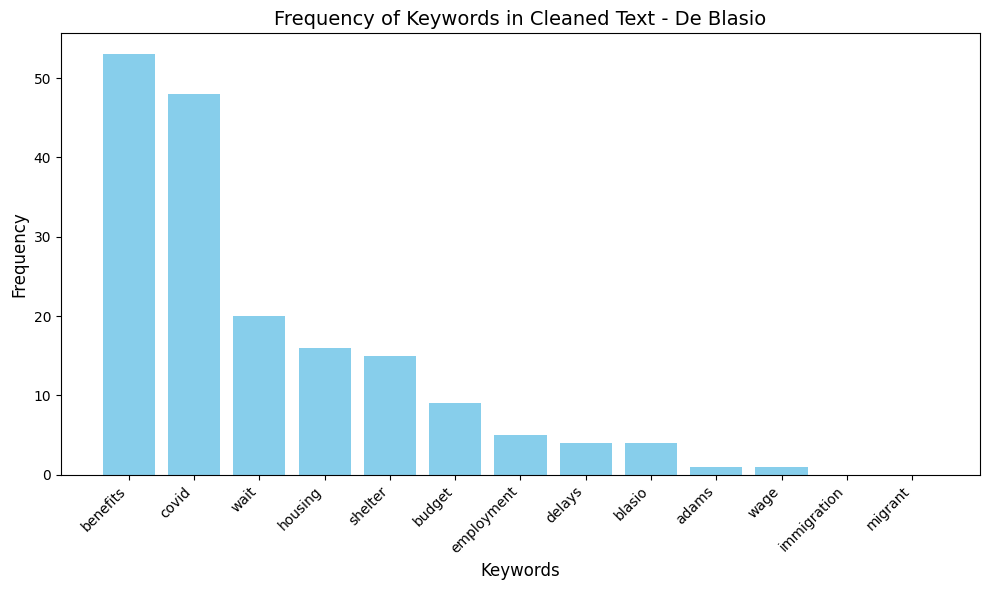

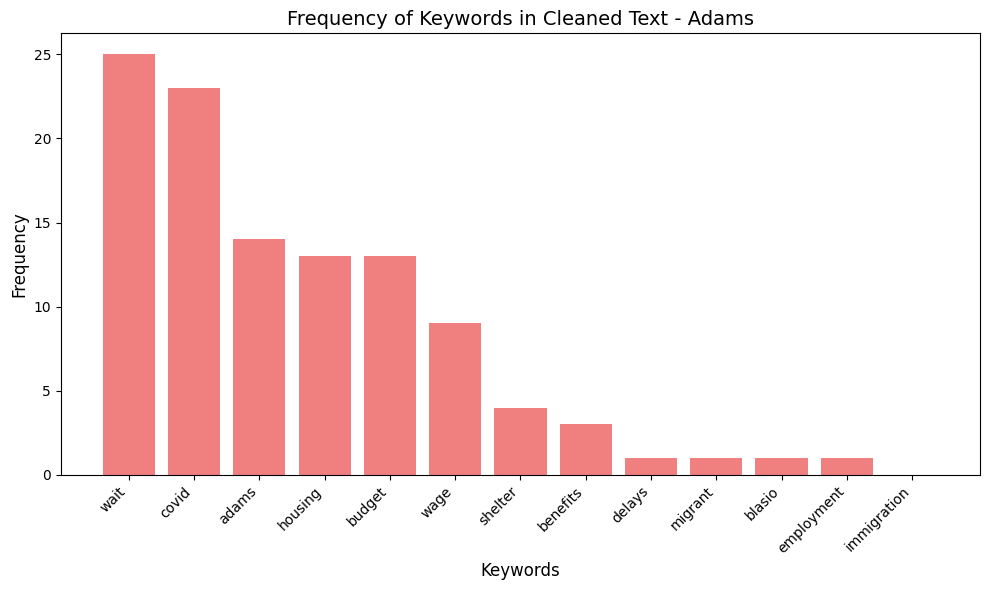

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Define keywords and initialize frequency dictionaries
key_words = ['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment', 'rent']

# Initialize the keyword frequency dictionaries with 0 counts for each keyword
keyword_frequencies_deblasio = {keyword: 0 for keyword in key_words}
keyword_frequencies_adams = {keyword: 0 for keyword in key_words}

for keyword in key_words:

    keyword_frequencies_deblasio[keyword] = tokens_deblasio.count(keyword.lower())
    keyword_frequencies_adams[keyword] = tokens_adams.count(keyword.lower())


keywords = key_words
de_blasio_frequencies = [keyword_frequencies_deblasio[keyword] for keyword in key_words]
adams_frequencies = [keyword_frequencies_adams[keyword] for keyword in key_words]

# Sort the frequencies
sorted_frequencies_adams = dict(sorted(keyword_frequencies_adams.items(), key=lambda item: item[1], reverse=True))
sorted_frequencies_deblasio = dict(sorted(keyword_frequencies_deblasio.items(), key=lambda item: item[1], reverse=True))

# Plot the first chart for De Blasio
plt.figure(figsize=(10, 6))
plt.bar(sorted_frequencies_deblasio.keys(), sorted_frequencies_deblasio.values(), color='skyblue')
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Keywords in Cleaned Text - De Blasio', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the second chart for Adams
plt.figure(figsize=(10, 6))
plt.bar(sorted_frequencies_adams.keys(), sorted_frequencies_adams.values(), color='lightcoral')
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Keywords in Cleaned Text - Adams', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#I adapted this script from Rebecca Krisel's Intro to NLTK Workshop: https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb and asked ChatGPT to incorporate my keyword list

Sentiment Analysis
I used VADER, designed for short social media texts to capture subtle positive and negative tones in comments, to conduct the sentiment analysis on my keyword list. I downloaded the NLTK library for keyword extraction and co-occurrence analysis to reveal different trends in complaints across the shift from de Blasio to Adams. I segmented the posts by administration to capture if negativity increases around topics like housing shortages, covid, and benefits access delays.

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('all')

analyzer = SentimentIntensityAnalyzer()
#I adapted this script from Melanie Walsh's Sentiment Analysis: https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/04-Sentiment-Analysis.html

In [62]:
def get_sentiment(text):
    # Get the sentiment scores for the text
    scores = analyzer.polarity_scores(text)

    # Return the compound sentiment score (this score reflects the overall sentiment)
    return scores['compound']

# Ensure you're working with a copy of the DataFrame to avoid SettingWithCopyWarning
adams_df = adams_df.copy()
deblasio_df = deblasio_df.copy()

# Apply the get_sentiment function using .loc to avoid SettingWithCopyWarning
adams_df.loc[:, 'combined_text_sentiment'] = adams_df['combined_text'].apply(get_sentiment)
adams_df.loc[:, 'parent_comment_sentiment'] = adams_df['cleaned_top_parent_comment'].apply(get_sentiment)
deblasio_df.loc[:, 'combined_text_sentiment'] = deblasio_df['combined_text'].apply(get_sentiment)
deblasio_df.loc[:, 'parent_comment_sentiment'] = deblasio_df['cleaned_top_parent_comment'].apply(get_sentiment)

# Adjust display settings for horizontal output
pd.set_option('display.max_colwidth', 100)  # Truncate long columns for better readability
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping for wide DataFrames

# Adams Period Sentiment Analysis - Set index to comment ID for better readability
adams_display = adams_df[['combined_text', 'combined_text_sentiment', 'cleaned_top_parent_comment', 'parent_comment_sentiment']]
adams_display = adams_display.reset_index(drop=True)

# De Blasio Period Sentiment Analysis - Set index to comment ID for better readability
deblasio_display = deblasio_df[['combined_text', 'combined_text_sentiment', 'cleaned_top_parent_comment', 'parent_comment_sentiment']]
deblasio_display = deblasio_display.reset_index(drop=True)

# Print Results
print("Adams Period Sentiment Analysis:")
print(adams_display)

print("\nDe Blasio Period Sentiment Analysis:")
print(deblasio_display)
#Using Melanie Walsh's Sentiment Analysis guide, I prompted ChatGPT to write a code to apply the sentiment analysis to my two dataframes and specific columns

Adams Period Sentiment Analysis:
                                                                                           combined_text  combined_text_sentiment                                                                           cleaned_top_parent_comment  parent_comment_sentiment
0    New York City Public High School Student Situation Beyond Control like preface stating remote le...                   0.9836                            Edit seems school officials trying find OP safe deleting contents comment                    0.4404
1                                                                                             often see                    0.0000                                                                Somebody got ta moderate two NYC subs                    0.0000
2                                                                                             Fuck Ohio                   -0.5423                                                                   

To analyze the average sentiment, I selected the key words from my initial hypthosis with a frequency of greater than 10. Anything under 10 was dropped, as the terms were less relevant than originally expected. The words I removed from my key word search were: immigration, migrant, delay, Blasio, and employment.

In [63]:
# Initialize the keywords list
keywords = ['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment', 'rent']

# Function to calculate average sentiment for each keyword
def calculate_average_sentiment(df, keywords, sentiment_column):
    average_sentiments = {}

    for keyword in keywords:
        # Filter rows where the keyword is present in 'combined_text'
        # using str.contains for case-insensitive search
        keyword_rows = df[df['combined_text'].str.contains(keyword, case=False, na=False)]

        # Calculate the average sentiment score for these rows
        avg_sentiment = keyword_rows[sentiment_column].mean()
        average_sentiments[keyword] = avg_sentiment

    return average_sentiments

# Calculate average sentiment for Adams period
adams_average_sentiments = calculate_average_sentiment(adams_df, keywords, 'post_sentiment')

# Calculate average sentiment for De Blasio period
deblasio_average_sentiments = calculate_average_sentiment(deblasio_df, keywords, 'post_sentiment')

# Print the average sentiment for each keyword for both periods
print("Average Post Sentiment for Adams Period:")
for keyword, avg_sentiment in adams_average_sentiments.items():
    print(f"{keyword}: {avg_sentiment}")

print("\nAverage Post Sentiment for De Blasio Period:")
for keyword, avg_sentiment in deblasio_average_sentiments.items():
    print(f"{keyword}: {avg_sentiment}")

#Using Melanie Walsh's Sentiment Analysis guide, I prompted ChatGPT to write a code to apply the sentiment analysis to my two dataframes and the post_sentiment column


Average Post Sentiment for Adams Period:
wage: 0.3994333333333333
adams: 0.00497272727272727
shelter: -0.875
budget: 0.4926333333333333
housing: 0.14523
wait: 0.2666866666666667
benefits: 0.9638
covid: 0.6643
blasio: -0.34

Average Post Sentiment for De Blasio Period:
wage: 0.9997
adams: 0.0
shelter: 0.33794
budget: 0.9337
housing: 0.59494
wait: 0.5327391304347826
benefits: 0.9997
covid: 0.17435000000000003
blasio: -0.0677625


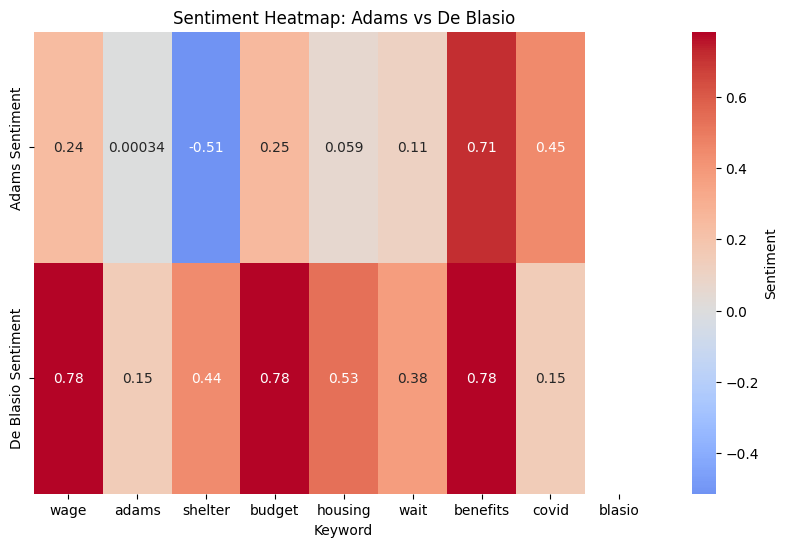

In [76]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # Ensure you have plt imported for the plot

# Define the keywords list
keywords = ['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment', 'rent']

# Create a DataFrame
# Convert dictionaries to lists for 'Adams Sentiment' and 'De Blasio Sentiment' columns
data = {
    'Keyword': keywords,
    'Adams Sentiment': [adams_average_sentiments.get(keyword, float('nan')) for keyword in keywords],
    'De Blasio Sentiment': [deblasio_average_sentiments.get(keyword, float('nan')) for keyword in keywords]
}

df = pd.DataFrame(data)

# Plotting heatmap
df.set_index('Keyword', inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df.T, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Sentiment'})
plt.title('Sentiment Heatmap: Adams vs De Blasio')
plt.show()

#I adapted the above script from Geeks for Geeks Seaborn Heatmap Guide: https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/ and I prompted ChatGPT to modify the code with my keyword list

To analyze the sentiment of the keywords with a frequency distribution greater than 10, I took the average sentiment from the post sentiment column. Budget and Wage have the highest sentiment score. This likely alludes to the liminations of sentiment analysis - both of these keywords were viewed positively in the press or in anlysis of the mayors' administrations. Budget, particularly during the Adams administration was highly criticized as he cut the budget of all agencies by 5% and threated to significantly reduce library and senior services. Benefits had the highest sentiment score at 0.99, which could highlight the increase in benefits during the Covid pandemic or just show that Reddit users speak positively about benefits offered in NYC. Wage also had a high sentiment score under de Blasio, surprising given the percentage of people unemployed.

Keywords that received the lowest sentiment scores were Adams at 0.004 and shelter at 0.13. The low rating of shelter from 2020 - 2023 aligns with my hypothesis that shelter would be perceived as negative during the timeframe. This is when shelters were at capacity due to the migrant crisis. Adams also has the lowest sentiment score.

In [68]:
# Ensure DataFrame slices are explicit copies to avoid SettingWithCopyWarning
deblasio_df = reddit_short_df[(reddit_short_df['date'] >= start_date_deblasio) & (reddit_short_df['date'] <= end_date_deblasio)].copy()
adams_df = reddit_short_df[(reddit_short_df['date'] >= start_date_adams) & (reddit_short_df['date'] <= end_date_adams)].copy()

# Initialize the keywords list
keywords = ['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment', 'rent']

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Create the get_sentiment function
def get_sentiment(text):
    # Get the sentiment scores for the text
    scores = analyzer.polarity_scores(text)

    # Return the compound sentiment score (this score reflects the overall sentiment)
    return scores['compound']

# Apply the get_sentiment function to both DataFrames
adams_df['parent_comment_sentiment'] = adams_df['cleaned_top_parent_comment'].apply(get_sentiment)
deblasio_df['parent_comment_sentiment'] = deblasio_df['cleaned_top_parent_comment'].apply(get_sentiment)

# Function to calculate average sentiment for each keyword for both periods
def calculate_average_sentiment(df, keywords, sentiment_column):
    average_sentiments = {}

    for keyword in keywords:
        # Filter rows where the keyword is present in 'combined_text'
        # using str.contains for case-insensitive search
        keyword_rows = df[df['combined_text'].str.contains(keyword, case=False, na=False)]

        # Calculate the average sentiment score for these rows
        avg_sentiment = keyword_rows[sentiment_column].mean()
        average_sentiments[keyword] = avg_sentiment

    return average_sentiments

# Calculate average sentiment for Adams period
adams_average_sentiments = calculate_average_sentiment(adams_df, keywords, 'parent_comment_sentiment')

# Calculate average sentiment for De Blasio period
deblasio_average_sentiments = calculate_average_sentiment(deblasio_df, keywords, 'parent_comment_sentiment')

# Print the average sentiment for Adams period
print("Average Parent Comment Sentiment for Adams Period:")
for keyword, sentiment in adams_average_sentiments.items():
    print(f"{keyword}: {sentiment}")

# Print a separator line
print("\n" + "-"*40 + "\n")

# Print the average sentiment for De Blasio period
print("Average Parent Comment Sentiment for De Blasio Period:")
for keyword, sentiment in deblasio_average_sentiments.items():
    print(f"{keyword}: {sentiment}")

#Using Melanie Walsh's Sentiment Analysis guide, I prompted ChatGPT to write a code to include the parent_comment sentiment for the Adams time period and de Blasio time period.

Average Parent Comment Sentiment for Adams Period:
wage: 0.0857
adams: -0.004300000000000011
shelter: -0.1531
budget: 0.016111111111111114
housing: -0.02779999999999999
wait: -0.042086666666666654
benefits: 0.4588
covid: 0.22802727272727272

----------------------------------------

Average Parent Comment Sentiment for De Blasio Period:
wage: 0.5574
adams: 0.296
shelter: 0.53852
budget: 0.6306333333333334
housing: 0.4664400000000001
wait: 0.2194217391304348
benefits: 0.5574
covid: 0.13276333333333334


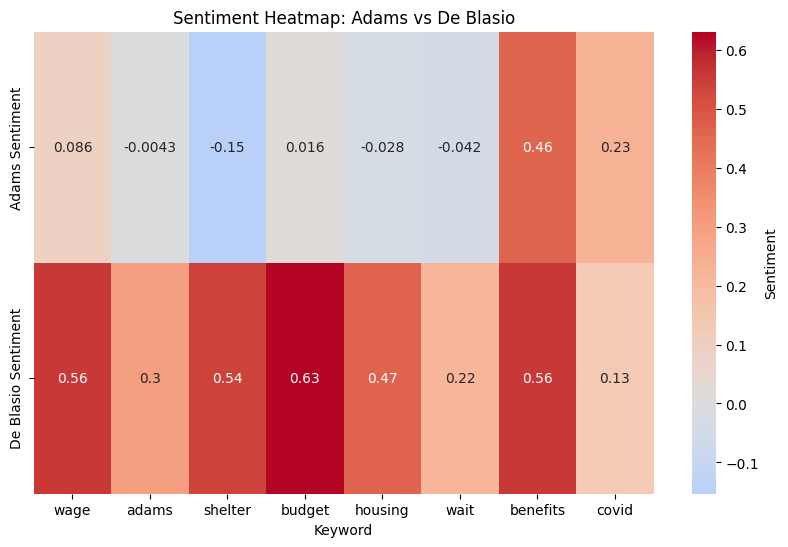

In [66]:
# Define the keywords list
keywords = ['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment', 'rent']

# Create a DataFrame
# Convert dictionaries to lists for 'Adams Sentiment' and 'De Blasio Sentiment' columns
data = {
    'Keyword': keywords,
    'Adams Sentiment': [adams_average_sentiments.get(keyword, float('nan')) for keyword in keywords],
    'De Blasio Sentiment': [deblasio_average_sentiments.get(keyword, float('nan')) for keyword in keywords]
}

df = pd.DataFrame(data)

# Plotting heatmap
df.set_index('Keyword', inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df.T, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Sentiment'})
plt.title('Sentiment Heatmap: Adams vs De Blasio')
plt.show()

#I adapted the above script from Geeks for Geeks Seaborn Heatmap Guide: https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/ and I prompted ChatGPT to modify the code with my keyword list

In [74]:
# Ensure DataFrame slices are explicit copies to avoid SettingWithCopyWarning
deblasio_df = reddit_short_df[(reddit_short_df['date'] >= start_date_deblasio) & (reddit_short_df['date'] <= end_date_deblasio)].copy()
adams_df = reddit_short_df[(reddit_short_df['date'] >= start_date_adams) & (reddit_short_df['date'] <= end_date_adams)].copy()

# Initialize the keywords list
keywords = ['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment', 'rent']

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Create the get_sentiment function
def get_sentiment(text):
    # Get the sentiment scores for the text
    scores = analyzer.polarity_scores(text)

    # Return the compound sentiment score (this score reflects the overall sentiment)
    return scores['compound']

# Apply the get_sentiment function to both DataFrames, creating 'post_sentiment'
adams_df['post_sentiment'] = adams_df['combined_text'].apply(get_sentiment) #Creating post_sentiment column
adams_df['parent_comment_sentiment'] = adams_df['cleaned_top_parent_comment'].apply(get_sentiment)
deblasio_df['post_sentiment'] = deblasio_df['combined_text'].apply(get_sentiment) #Creating post_sentiment column
deblasio_df['parent_comment_sentiment'] = deblasio_df['cleaned_top_parent_comment'].apply(get_sentiment)

# Function to calculate average sentiment for each keyword across both parent_comment_sentiment and post_sentiment
def calculate_average_sentiment(df, keywords):
    average_sentiments = {}

    for keyword in keywords:
        # Filter rows where the keyword is present in 'combined_text'
        keyword_rows = df[df['combined_text'].str.contains(keyword, case=False, na=False)].copy()  # Explicit copy to avoid SettingWithCopyWarning

        # Calculate the average sentiment score for these rows across both columns (parent_comment_sentiment and post_sentiment)
        keyword_rows['average_sentiment'] = keyword_rows[['parent_comment_sentiment', 'post_sentiment']].mean(axis=1)

        # Calculate the average of the combined sentiment for this keyword
        avg_sentiment = keyword_rows['average_sentiment'].mean()
        average_sentiments[keyword] = avg_sentiment

    return average_sentiments

# Calculate average sentiment for Adams period
adams_average_sentiments = calculate_average_sentiment(adams_df, keywords)

# Calculate average sentiment for De Blasio period
deblasio_average_sentiments = calculate_average_sentiment(deblasio_df, keywords)

# Print the average sentiment for each keyword for both periods
print("Average Sentiment for Adams Period (combined):")
for keyword, avg_sentiment in adams_average_sentiments.items():
    print(f"{keyword}: {avg_sentiment}")

print("\nAverage Sentiment for De Blasio Period (combined):")
for keyword, avg_sentiment in deblasio_average_sentiments.items():
    print(f"{keyword}: {avg_sentiment}")

#Using Melanie Walsh's Sentiment Analysis guide, I prompted ChatGPT to write a code to average the sentiment for the Adams time period and de Blasio time period.

Average Sentiment for Adams Period (combined):
wage: 0.24256666666666662
adams: 0.00033636363636363464
shelter: -0.51405
budget: 0.2543722222222222
housing: 0.058715
wait: 0.1123
benefits: 0.7113
covid: 0.4461636363636364

Average Sentiment for De Blasio Period (combined):
wage: 0.7785500000000001
adams: 0.148
shelter: 0.43823
budget: 0.7821666666666666
housing: 0.5306900000000001
wait: 0.3760804347826087
benefits: 0.7785500000000001
covid: 0.15355666666666667


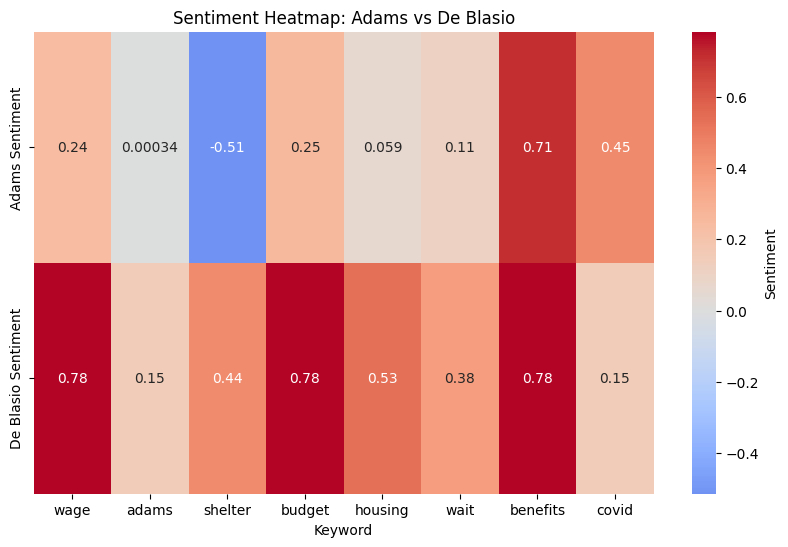

In [75]:
# Define the keywords list
keywords = ['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment', 'rent']

# Create a DataFrame
# Convert dictionaries to lists for 'Adams Sentiment' and 'De Blasio Sentiment' columns
data = {
    'Keyword': keywords,
    'Adams Sentiment': [adams_average_sentiments.get(keyword, float('nan')) for keyword in keywords],
    'De Blasio Sentiment': [deblasio_average_sentiments.get(keyword, float('nan')) for keyword in keywords]
}

df = pd.DataFrame(data)

# Plotting heatmap
df.set_index('Keyword', inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df.T, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Sentiment'})
plt.title('Sentiment Heatmap: Adams vs De Blasio')
plt.show()

#I adapted the above script from Geeks for Geeks Seaborn Heatmap Guide: https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/ and I prompted ChatGPT to modify the code with my keyword list

Adams has a slightly higher sentiment in parent comments but it is still the lowest of the key words. Benefits decreased significantly, by 0.4 to be 0.51. This could be because posts are generally more question oriented or neutral where as parent comments express a response to the post.

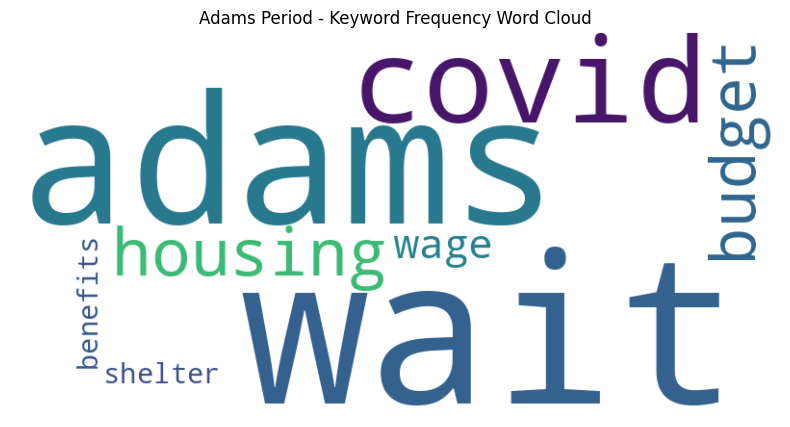

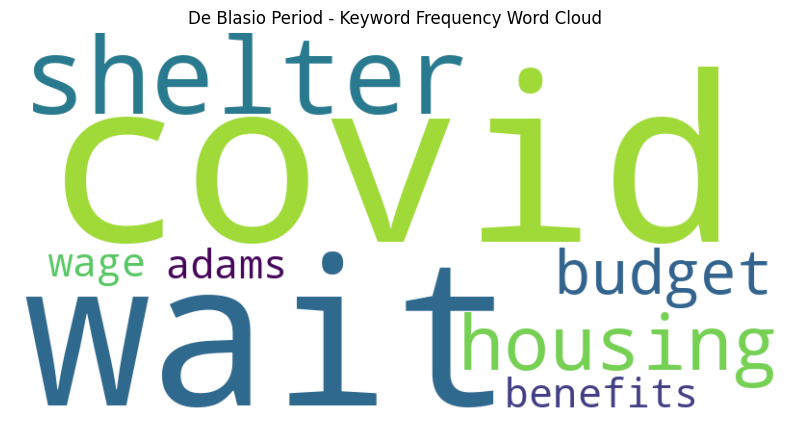

In [70]:
!pip install wordcloud matplotlib
from wordcloud import WordCloud

# Keywords list
keywords = ['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment', 'rent']

# Function to calculate keyword frequencies for a given DataFrame
def calculate_keyword_frequencies(df, keywords):
    # Initialize an empty dictionary to store frequencies
    keyword_frequencies = {}

    # Loop through each keyword
    for keyword in keywords:
        # Count occurrences of the keyword in 'combined_text' column, ignoring case
        keyword_frequencies[keyword] = df['combined_text'].str.contains(keyword, case=False).sum()

    return keyword_frequencies

# Calculate keyword frequencies for Adams period
adams_keyword_frequencies = calculate_keyword_frequencies(adams_df, keywords)

# Calculate keyword frequencies for De Blasio period
deblasio_keyword_frequencies = calculate_keyword_frequencies(deblasio_df, keywords)

# Create and display the word cloud for Adams period
wordcloud_adams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(adams_keyword_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_adams, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Adams Period - Keyword Frequency Word Cloud")
plt.show()

# Create and display the word cloud for De Blasio period
wordcloud_deblasio = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(deblasio_keyword_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_deblasio, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("De Blasio Period - Keyword Frequency Word Cloud")
plt.show()

#I adapted the above and below code from Geeks for Geeks Generating Word Cloud in Python Guide: https://www.geeksforgeeks.org/generating-word-cloud-python/ and asked ChatGPT to incorporate my key words and their respective frequency distribution

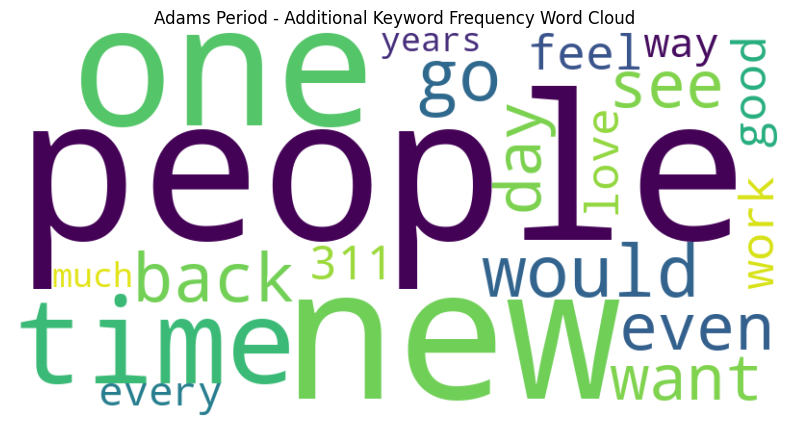

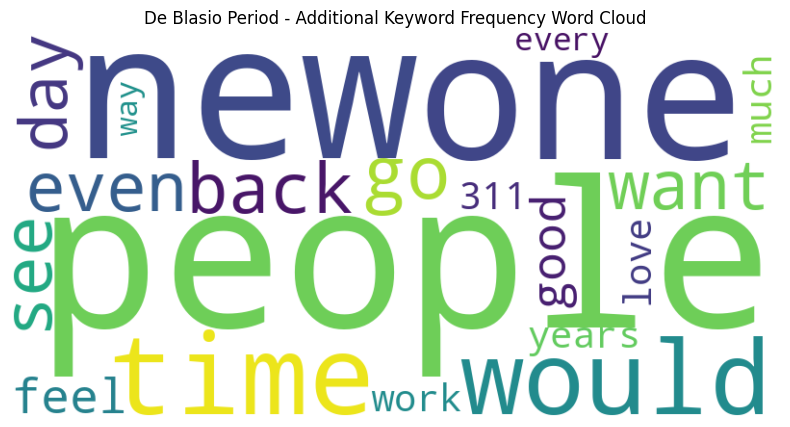

In [71]:
# Additional keywords with their frequencies for both periods
additional_keywords_adams = {
    'people': 519, 'new': 429, 'one': 393, 'time': 312, 'would': 274, 'go': 266,
    'back': 238, 'even': 215, 'see': 213, 'want': 210, 'day': 208, 'feel': 180,
    'good': 176, '311': 176, 'work': 175, 'love': 171, 'every': 170, 'way': 168,
    'years': 168, 'much': 167
}

additional_keywords_deblasio = {
    'people': 489, 'new': 421, 'one': 389, 'time': 318, 'would': 268, 'go': 257,
    'back': 230, 'even': 213, 'see': 210, 'want': 215, 'day': 206, 'feel': 173,
    'good': 172, '311': 160, 'work': 160, 'love': 159, 'every': 155, 'way': 150,
    'years': 162, 'much': 158
}

# Create and display the word cloud for Adams period using the additional keywords
wordcloud_adams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(additional_keywords_adams)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_adams, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Adams Period - Additional Keyword Frequency Word Cloud")
plt.show()

# Create and display the word cloud for De Blasio period using the additional keywords
wordcloud_deblasio = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(additional_keywords_deblasio)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_deblasio, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("De Blasio Period - Additional Keyword Frequency Word Cloud")
plt.show()


NYC Open Data 311 Analysis
1. df
2. 2020 - 2023
3. scrape 311 open data
3. clean 311 open data: lemmatize, tokenize, remove stop words
4. frequency analysis - broken up by de Blasio Jan 1, 2020 - Dec 31, 2021 and Adams Jan 1 2022 - Dec 31, 2023
6. Word Cloud, frequency distribution matplob

In [25]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Python F24/Final Project/311_Service_Requests (2).csv'

df = pd.read_csv(file_path)

print(df.head())

#I adapted this code from Rebecca Krisel's Data Manipulation in Pandas and Python Workshop: https://github.com/rskrisel/pandas/blob/main/pandas_workshop_2024.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unique Key            Created Date Agency  \
0    45285347  01/01/2020 12:00:00 AM  DOHMH   
1    45285651  01/01/2020 12:00:00 AM  DOHMH   
2    45285821  01/01/2020 12:00:00 AM  DOHMH   
3    45287907  01/01/2020 12:00:00 AM  DOHMH   
4    45288120  01/01/2020 12:00:00 AM  DOHMH   

                               Agency Name  Complaint Type Descriptor  \
0  Department of Health and Mental Hygiene  Food Poisoning  3 or More   
1  Department of Health and Mental Hygiene  Food Poisoning     1 or 2   
2  Department of Health and Mental Hygiene  Food Poisoning     1 or 2   
3  Department of Health and Mental Hygiene  Food Poisoning  3 or More   
4  Department of Health and Mental Hygiene  Food Poisoning  3 or More   

                Location Type  
0  Restaurant/Bar/Deli/Bakery  
1  Restaurant/Bar/Deli/Bakery  
2       Other (Explain Below)  
3  Restaurant/B

In [26]:
df

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type
0,45285347,01/01/2020 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery
1,45285651,01/01/2020 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery
2,45285821,01/01/2020 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Other (Explain Below)
3,45287907,01/01/2020 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery
4,45288120,01/01/2020 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery
...,...,...,...,...,...,...,...
12551685,59880311,12/30/2023 11:59:16 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk
12551686,59880364,12/30/2023 11:59:58 PM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk
12551687,59887511,12/31/2023 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery
12551688,59891038,12/31/2023 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery


In [27]:
df = df.drop(columns=['Location Type'])

In [28]:
print(df.columns)

Index(['Unique Key', 'Created Date', 'Agency', 'Agency Name', 'Complaint Type',
       'Descriptor'],
      dtype='object')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551690 entries, 0 to 12551689
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Unique Key      int64 
 1   Created Date    object
 2   Agency          object
 3   Agency Name     object
 4   Complaint Type  object
 5   Descriptor      object
dtypes: int64(1), object(5)
memory usage: 574.6+ MB


In [30]:
df['Unique Key'] = df['Unique Key'].astype(str)

print(df.dtypes)


Unique Key        object
Created Date      object
Agency            object
Agency Name       object
Complaint Type    object
Descriptor        object
dtype: object


In [31]:
print(df['Created Date'].min(), df['Created Date'].max())


01/01/2020 01:00:00 AM 12/31/2023 12:00:00 AM


In [32]:
df['Created Date'] = pd.to_datetime(df['Created Date'],
                                    format='%m/%d/%Y %I:%M:%S %p')

In [9]:
df[df.duplicated(keep=False)]

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor


In [33]:
unique_agencies = df['Agency'].unique()

print(unique_agencies)


['DOHMH' 'NYPD' 'EDC' 'HPD' 'DOT' 'TLC' 'DSNY' 'DOB' 'DEP' 'DPR' 'DCWP'
 'DHS' 'DOITT' 'DFTA' 'DOE' 'OSE' 'OTI']


I made the decision to include NYPD because calls about unhoused populations often are directed to the NYPD. The other agencies are directly related to benefits, wages, and social services.

In [34]:
agencies_to_include = ['DOHMH', 'NYPD', 'HPD', 'DCWP', 'DHS']

agencies_df = df[df['Agency'].isin(agencies_to_include)]

print(agencies_df)


         Unique Key        Created Date Agency  \
0          45285347 2020-01-01 00:00:00  DOHMH   
1          45285651 2020-01-01 00:00:00  DOHMH   
2          45285821 2020-01-01 00:00:00  DOHMH   
3          45287907 2020-01-01 00:00:00  DOHMH   
4          45288120 2020-01-01 00:00:00  DOHMH   
...             ...                 ...    ...   
12551685   59880311 2023-12-30 23:59:16   NYPD   
12551686   59880364 2023-12-30 23:59:58   NYPD   
12551687   59887511 2023-12-31 00:00:00  DOHMH   
12551688   59891038 2023-12-31 00:00:00  DOHMH   
12551689   59883854 2023-12-31 00:00:00  DOHMH   

                                      Agency Name   Complaint Type  \
0         Department of Health and Mental Hygiene   Food Poisoning   
1         Department of Health and Mental Hygiene   Food Poisoning   
2         Department of Health and Mental Hygiene   Food Poisoning   
3         Department of Health and Mental Hygiene   Food Poisoning   
4         Department of Health and Mental Hygiene

I am not going to tokenize because the data is already tokenized. Below I decided to remove any descriptor with more than one description because it just provides numbers and not words, not good for analysis.

In [35]:
df_filtered = agencies_df[agencies_df['Descriptor'].apply(lambda x: not bool(pd.notnull(x) and isinstance(x, str) and any(char.isdigit() for char in x)))]

print(df_filtered)

         Unique Key        Created Date Agency  \
9          45282225 2020-01-01 00:01:12   NYPD   
10         45281175 2020-01-01 00:01:37   NYPD   
11         45278238 2020-01-01 00:01:46   NYPD   
12         45280733 2020-01-01 00:01:56   NYPD   
13         45281554 2020-01-01 00:03:23   NYPD   
...             ...                 ...    ...   
12551681   59884928 2023-12-30 23:58:35   NYPD   
12551683   59884825 2023-12-30 23:58:48   NYPD   
12551684   59884625 2023-12-30 23:58:56    HPD   
12551685   59880311 2023-12-30 23:59:16   NYPD   
12551686   59880364 2023-12-30 23:59:58   NYPD   

                                                Agency Name  \
9                           New York City Police Department   
10                          New York City Police Department   
11                          New York City Police Department   
12                          New York City Police Department   
13                          New York City Police Department   
...                  

In [36]:
df_filtered

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor
9,45282225,2020-01-01 00:01:12,NYPD,New York City Police Department,Blocked Driveway,No Access
10,45281175,2020-01-01 00:01:37,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party
11,45278238,2020-01-01 00:01:46,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding
12,45280733,2020-01-01 00:01:56,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party
13,45281554,2020-01-01 00:03:23,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party
...,...,...,...,...,...,...
12551681,59884928,2023-12-30 23:58:35,NYPD,New York City Police Department,Illegal Parking,Blocked Crosswalk
12551683,59884825,2023-12-30 23:58:48,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking
12551684,59884625,2023-12-30 23:58:56,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING
12551685,59880311,2023-12-30 23:59:16,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant


Now, I need to divide my data into two date ranges per administration and summarize the number of complaints.

In [37]:
date_range1_start = '2020-01-01'
date_range1_end = '2021-12-31'
date_range2_start = '2022-01-01'
date_range2_end = '2023-12-31'

# Filter the DataFrame for each date range
df_range1 = df_filtered[(df_filtered['Created Date'] >= date_range1_start) & (df_filtered['Created Date'] <= date_range1_end)]
df_range2 = df_filtered[(df_filtered['Created Date'] >= date_range2_start) & (df_filtered['Created Date'] <= date_range2_end)]

# Group by 'Agency' and count the complaints
complaints_range1 = df_range1['Agency'].value_counts().reset_index()
complaints_range1.columns = ['Agency', 'Complaints (2020-2021)']

complaints_range2 = df_range2['Agency'].value_counts().reset_index()
complaints_range2.columns = ['Agency', 'Complaints (2022-2023)']

# Merge the results into a single DataFrame
complaints_summary = pd.merge(
    complaints_range1,
    complaints_range2,
    on='Agency',
    how='outer'
).fillna(0)  # Fill NaN values with 0

# Convert counts to integers
complaints_summary[['Complaints (2020-2021)', 'Complaints (2022-2023)']] = complaints_summary[
    ['Complaints (2020-2021)', 'Complaints (2022-2023)']
].astype(int)

# Display the summary
print(complaints_summary)

#I prompted ChatGPT to group the complaints by agency across the two timeframes and print as a table.

  Agency  Complaints (2020-2021)  Complaints (2022-2023)
0   DCWP                   55248                   44426
1    DHS                   66282                   93081
2  DOHMH                  134566                  162574
3    HPD                  983910                 1347442
4   NYPD                 2579098                 2771568


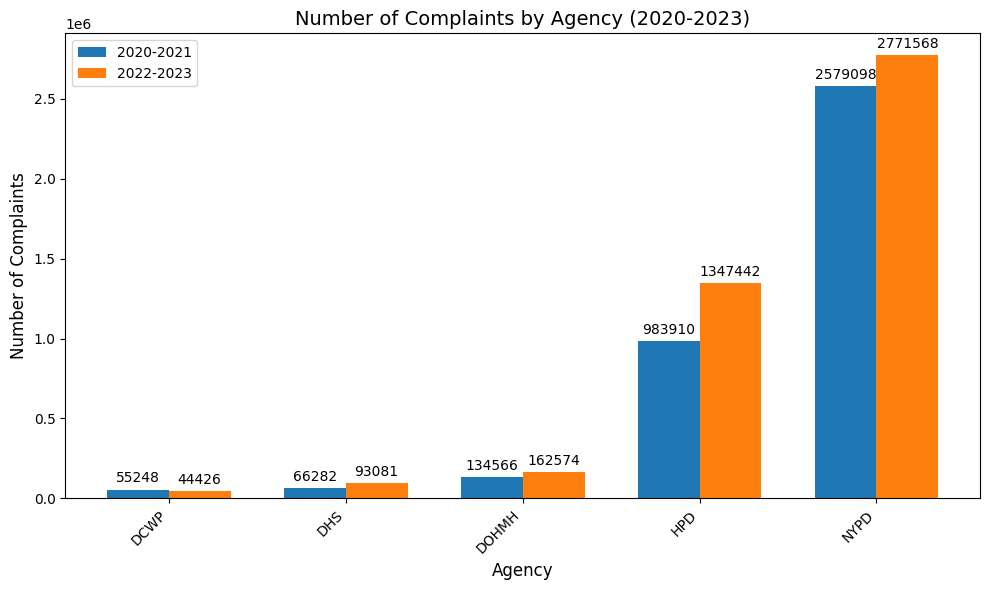

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Set positions and width for the bars
x = np.arange(len(complaints_summary['Agency']))  # label locations
width = 0.35  # width of bars

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each date range
bars1 = ax.bar(x - width/2, complaints_summary['Complaints (2020-2021)'], width, label='2020-2021')
bars2 = ax.bar(x + width/2, complaints_summary['Complaints (2022-2023)'], width, label='2022-2023')

# Add labels, title, and legend
ax.set_xlabel('Agency', fontsize=12)
ax.set_ylabel('Number of Complaints', fontsize=12)
ax.set_title('Number of Complaints by Agency (2020-2023)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(complaints_summary['Agency'], rotation=45, ha='right')
ax.legend()

# Add value annotations on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text above the bar
                textcoords="offset points",
                ha='center', va='bottom')

# Improve layout
plt.tight_layout()
plt.show()

#I adapted this code from Rebecca Krisel's Data Manipulation in Pandas and Python Workshop: https://github.com/rskrisel/pandas/blob/main/pandas_workshop_2024.ipynb and prompted ChatGPT to modify the code with the two time frames

In [39]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

# Ensure stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab model

# Define stop words and punctuation
custom_stop_words = ['nan']
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to preprocess and get word frequencies
def get_top_words(df, column_name, top_n=20):
    # Combine all text in the specified column
    all_text = ' '.join(df[column_name].dropna().astype(str))

    # Tokenize, remove punctuation and stop words, and convert to lowercase
    tokens = word_tokenize(all_text)
    cleaned_tokens = [
        word.lower() for word in tokens
        if word.lower() not in stop_words and word not in punctuation and word.isalpha()
    ]

    # Get word frequencies
    freq_dist = FreqDist(cleaned_tokens)
    return freq_dist.most_common(top_n)

# Get top 20 words for each period
df_filtered.loc[:, 'Created Date'] = pd.to_datetime(df_filtered['Created Date'])

df_range1 = df_filtered.loc[(df_filtered['Created Date'] >= date_range1_start) & (df_filtered['Created Date'] <= date_range1_end)]
df_range2 = df_filtered.loc[(df_filtered['Created Date'] >= date_range2_start) & (df_filtered['Created Date'] <= date_range2_end)]

top_words_range1 = get_top_words(df_range1, 'Descriptor', top_n=20)
top_words_range2 = get_top_words(df_range2, 'Descriptor', top_n=20)

# Print results
print("Top 20 Words for de Blasio Administration in 311 Data:")
for word, count in top_words_range1:
    print(f"{word}: {count}")

print("\nTop 20 Words for Adams Administration in 311 Data:")
for word, count in top_words_range2:
    print(f"{word}: {count}")
#I adapted this script from Rebecca Krisel's Intro to NLTK Workshop: https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb and prompted ChatGPT to update the code with two timeframes, custom stop words, and top 20 words.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Top 20 Words for de Blasio Administration in 311 Data:
loud: 1086202
access: 269019
blocked: 259941
building: 237017
entire: 236874
parking: 186496
hydrant: 169161
violation: 142725
apartment: 128232
posted: 124475
sign: 124194
music: 115506
talking: 103409
license: 83254
plate: 82385
pests: 79778
sidewalk: 68731
partial: 63257
social: 59998
distancing: 59998

Top 20 Words for Adams Administration in 311 Data:
loud: 918816
blocked: 459263
building: 325804
entire: 325502
access: 321767
parking: 303111
hydrant: 261630
violation: 212223
posted: 202208
sign: 202190
apartment: 170598
license: 152839
plate: 131919
pests: 114753
talking: 110069
sidewalk: 98291
partial: 84395
commercial: 84086
overnight: 84086
music: 79430


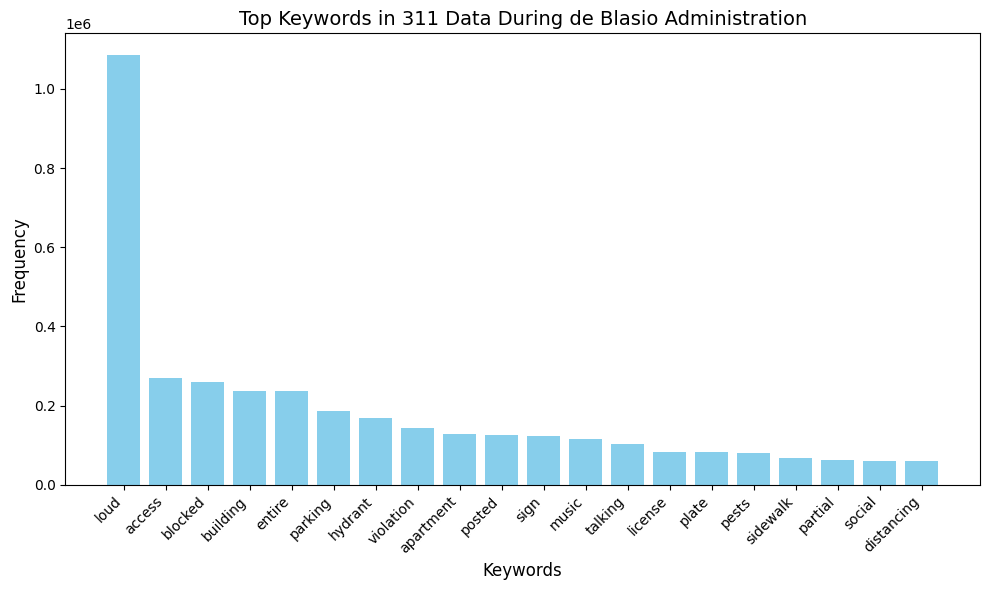

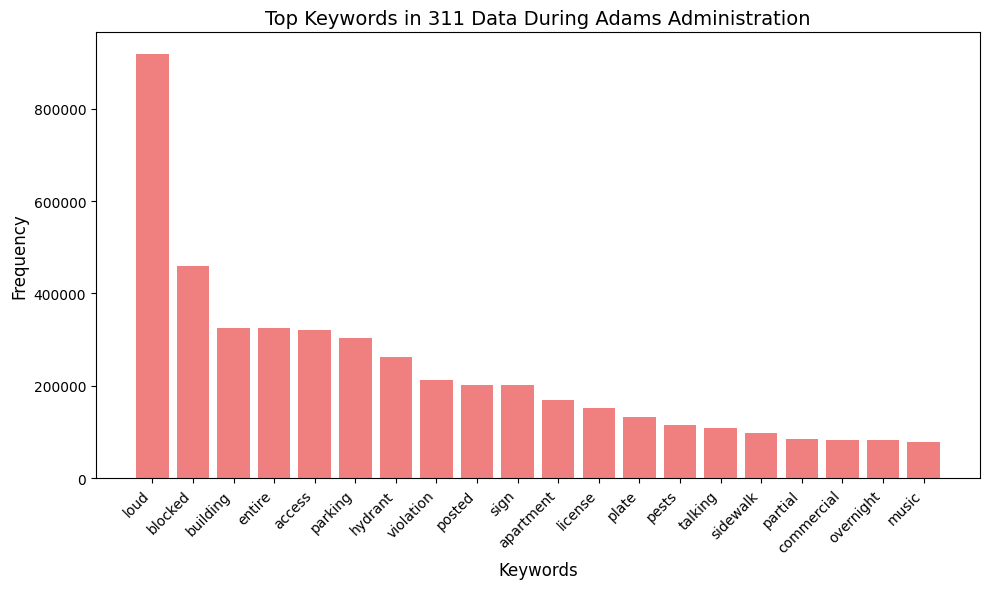

In [40]:
range1_df = range1_df.sort_values(by='Count', ascending=False)
range2_df = range2_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(range1_df['Word'], range1_df['Count'], color='skyblue')
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Keywords in 311 Data During de Blasio Administration', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range2_df['Word'], range2_df['Count'], color='lightcoral')
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Keywords in 311 Data During Adams Administration', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#I adapted this script from Rebecca Krisel's Pandas Workshop: https://github.com/rskrisel/pandas/blob/main/pandas_workshop_2024.ipynb

In [41]:
key_words = ['housing', 'benefits', 'shelter', 'wait', 'delays', 'budget', 'immigration', 'migrant', 'covid', 'blasio', 'adams', 'wage', 'employment', 'rent']

def count_keywords(df, key_words, text_column):
    keyword_counts = {word: 0 for word in key_words}  # Initialize dictionary with 0 counts for each keyword

    # Iterate over each row in the DataFrame
    for text in df[text_column].dropna():  # Use dropna() to skip NaN values
        # Convert text to lowercase for case-insensitive matching
        text = text.lower()

        # Check each keyword and count its occurrences
        for word in key_words:
            keyword_counts[word] += text.count(word)  # Count occurrences of the word in the text

    return keyword_counts

keyword_counts_deblasio = count_keywords(df_range1, key_words, 'Descriptor')
keyword_counts_adams = count_keywords(df_range2, key_words, 'Descriptor')

print("Keyword Counts for de Blasio Administration:")
for word, count in keyword_counts_deblasio.items():
    print(f"{word}: {count}")

print("\nKeyword Counts for Adams Administration:")
for word, count in keyword_counts_adams.items():
    print(f"{word}: {count}")

#I adapted this script from Rebecca Krisel's Intro to NLTK Workshop: https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb and prompted ChatGPT to update the code with two timeframes and my keyword list

Keyword Counts for de Blasio Administration:
housing: 0
benefits: 0
shelter: 1051
wait: 192
delays: 0
budget: 0
immigration: 36
migrant: 0
covid: 0
blasio: 0
adams: 0
wage: 7311
employment: 335
rent: 446

Keyword Counts for Adams Administration:
housing: 0
benefits: 0
shelter: 1288
wait: 298
delays: 0
budget: 0
immigration: 56
migrant: 0
covid: 0
blasio: 0
adams: 0
wage: 9530
employment: 275
rent: 407


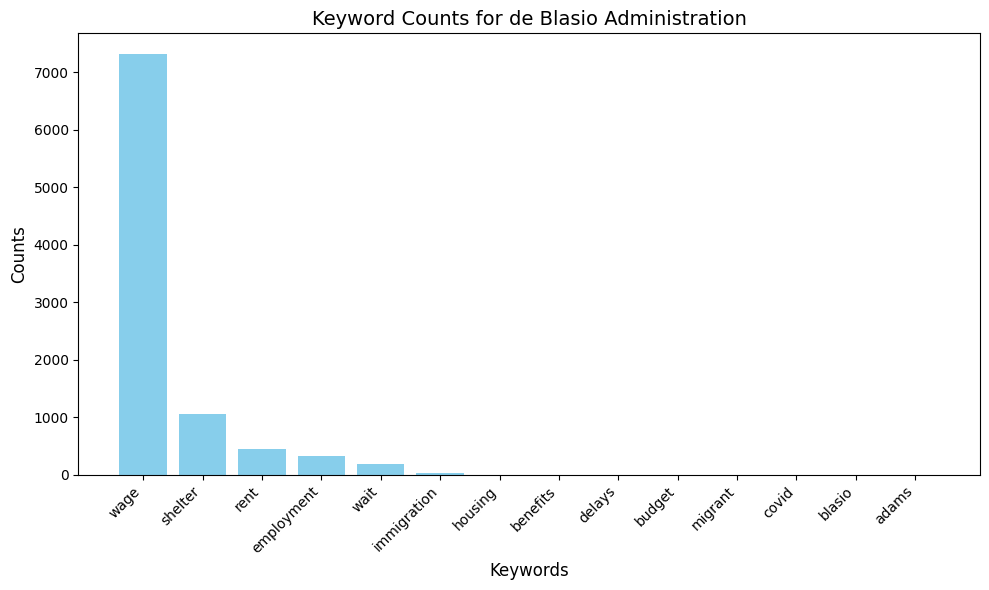

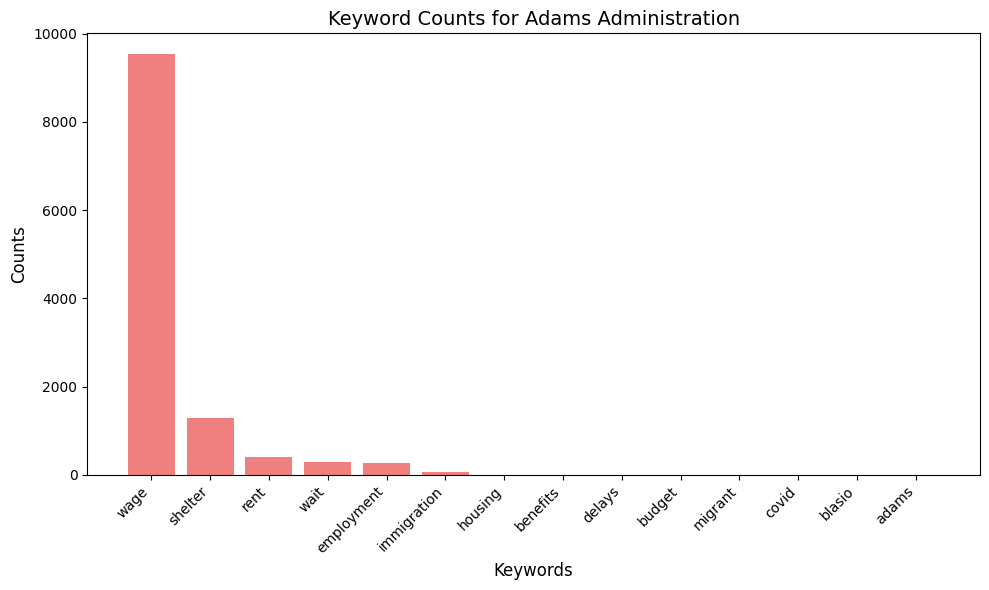

In [42]:
sorted_deblasio_counts = sorted(keyword_counts_deblasio.items(), key=lambda x: x[1], reverse=True)
sorted_adams_counts = sorted(keyword_counts_adams.items(), key=lambda x: x[1], reverse=True)

deblasio_keywords, deblasio_counts = zip(*sorted_deblasio_counts)
adams_keywords, adams_counts = zip(*sorted_adams_counts)

plt.figure(figsize=(10, 6))
plt.bar(deblasio_keywords, deblasio_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Keyword Counts for de Blasio Administration", fontsize=14)
plt.xlabel("Keywords", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(adams_keywords, adams_counts, color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.title("Keyword Counts for Adams Administration", fontsize=14)
plt.xlabel("Keywords", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.tight_layout()
plt.show()

#I adapted this script from Rebecca Krisel's Pandas Workshop: https://github.com/rskrisel/pandas/blob/main/pandas_workshop_2024.ipynb

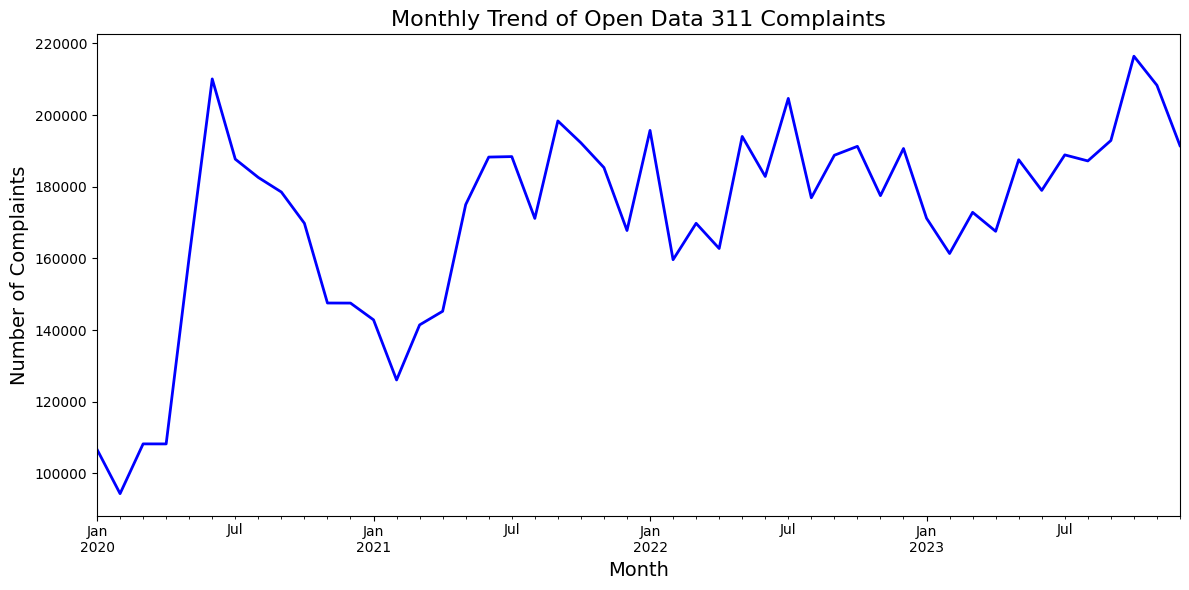

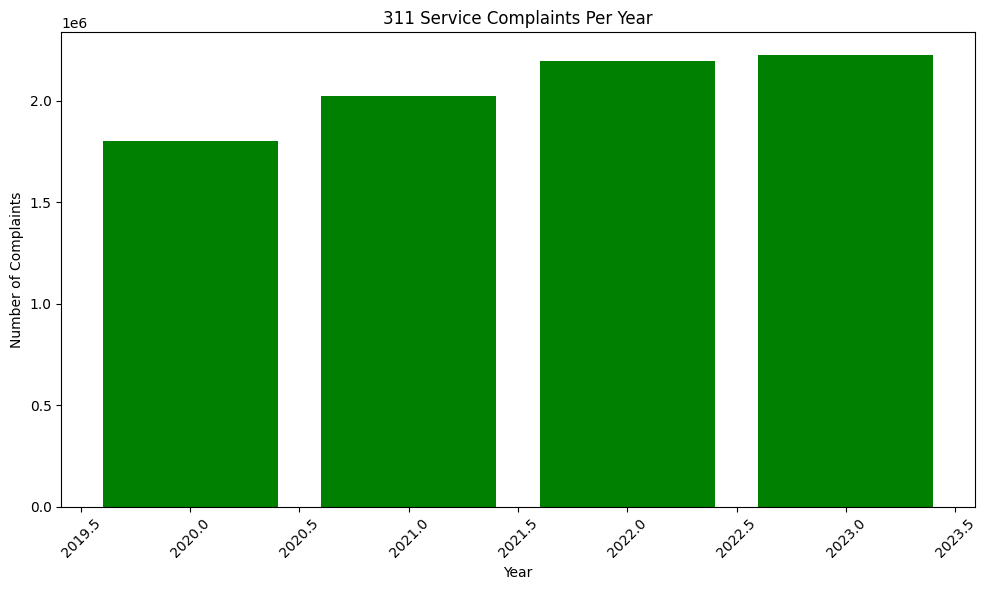

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Created Date' to datetime format if it's not already
df_filtered['Created Date'] = pd.to_datetime(df_filtered['Created Date'])

# Group by month, counting the number of complaints
monthly_trend = df_filtered.groupby(df_filtered['Created Date'].dt.to_period('M')).size()

# Set up the figure size for a larger plot
plt.figure(figsize=(12, 6))  # Increase the width and height for a larger graph

# Plotting the monthly trend
monthly_trend.plot(kind='line', color='b', linewidth=2)  # Use smooth lines with consistent color (blue)

# Adding title and labels
plt.title('Monthly Trend of Open Data 311 Complaints', fontsize=16)  # Title with larger font size
plt.xlabel('Month', fontsize=14)  # Label for the x-axis with larger font size
plt.ylabel('Number of Complaints', fontsize=14)  # Label for the y-axis with larger font size

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Plotting complaints per year
plt.figure(figsize=(10, 6))
plt.bar(complaints_per_year['Year'], complaints_per_year['Complaints'], color='green')
plt.title('311 Service Complaints Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for readability
plt.show()

#I adapted this script from Rebecca Krisel's Pandas Workshop: https://github.com/rskrisel/pandas/blob/main/pandas_workshop_2024.ipynb and prompted ChatGPT to adjust the layout for readability and to include the monthly trend as a line graph and the annual trend as a bar graph.